# **Chi - squared Test**

## **Goodness of Fit**

## **Problem Statement**

As the newly promoted Director of Sales Enablement you were worried that the number of deals for Q3 of 2021 went down. Your intuition tells you this might be because the Total Rep Activities for each segment is low. So you asked your Business Analysts to check if the Total Rep Activities for Q3 2021 is really low since the Total Rep Activities in each segment for the previous Q3s were generally stable. 

### **Dataset**

We'll be using dummy samples that contains the Reps Total Activity Count for each segment

### **Hypothesis Testing**

<i>**H0 (Null Hypothesis)**:</i><br>
<i>μ-q3_current_total_activities = μ-q3_previous_total_activities</i><br>
<i>**H1 (Alternative Hypothesis):**</i><br>
<i>μ-q3_previous_total_activities > μ-q3_current_total_activities</i><br>
<i>**X^2:** Chi - Squared</i><br>
<i>**Of:** Observed Frequency</i><br>
<i>**Ef:** Expected Frequency</i><br>

$$\chi^2 = \sum{\frac{(O_{f} - E_{f})^2} {E_{f}}}$$




### **Action**

Proceed with a Chi-Squared goodness of fit test and see if there's statistical evidence that the Total Activities for the current Q3 is lower than previous Q3s and its effect sizes - but in order to do this we'll be tweaking our perspective on the problem. Instead of checking if the Total Activities for the current Q3 is lower, we'll check if the Total Activities in the previous Q3 is higher than the current Q3 numbers.Use **α = 0.05**<br>

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import chisquare

### **Chi-Squared Goodness of Fit Assumptions**

https://www.spss-tutorials.com/chi-square-goodness-of-fit-test/#assumptions<br>

1. Independent observations;
2. For 2 categories, each expected frequency Ef must be at least 5. For 3+ categories, each Ef must be at least 1 and no more than 20% of all Ef may be smaller than 5.

In [35]:
total_activities = pd.DataFrame({
    'Segment': ['Enterprise', 'Majors', 'MidMarket', 'SMB', 'Strategic Partners', 'Special Accounts'],
    'Total Q3 2021 Activities': [528, 531, 379, 1479, 122, 156],
    'Total Q3 2020 Activities': [648, 720, 520, 1430, 48, 97]
})

In [50]:
observed_frequency = total_activities['Total Q3 2021 Activities'].values 
expected_frequency = total_activities['Total Q3 2020 Activities'].values 

obs_exp = (observed_frequency - expected_frequency) ** 2 / expected_frequency
chi_squared = obs_exp.sum()

degrees_of_freedom = 5

print(f'Chi-Squared Statistic = {chi_squared: .4f}')
print(f'p-value = {1 - chi2.cdf(chi_squared, degrees_of_freedom ): .4f}')

Chi-Squared Statistic =  261.7164
p-value =  0.0000


In [51]:
# Check if by-hand Chi Squared Statistic is the same to the Scipy Implementation
chi_squared_scipy = chisquare(total_activities['Total Q3 2021 Activities'], total_activities['Total Q3 2020 Activities'])

print(f'Chi-Squared Statistic (scipy) = {chi_squared_scipy.statistic: .4f}')
print(f'p-value (scipy) = {chi_squared_scipy.pvalue: .4f}')

Chi-Squared Statistic (scipy) =  261.7164
p-value (scipy) =  0.0000


### **Conclusion**

Since the p-value of our F-statistic < 0.05 it suggests that we reject the Null Hypothesis. Which indicates that there statistical evidence that at least one combination amongst our Routing Solutions fairs better or worse than the other solution. We now proceed to find which solution/s reduces our driver's Time to Complete by using effect size tests.

In [11]:
# Check sample normality - samplers are approximately normal

Text(0.5, 1.0, 'Non-AI assisted')

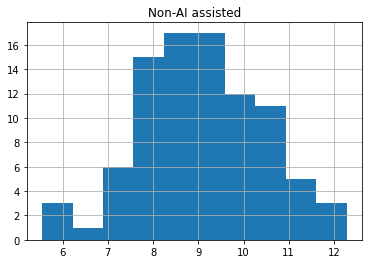

In [12]:
time_to_completion['Non-AI assisted'].hist()
plt.title('Non-AI assisted')

Text(0.5, 1.0, 'Assisted with AI 1')

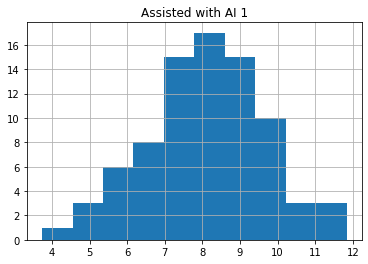

In [13]:
time_to_completion.loc[time_to_completion['Assisted with AI 1'] != -1,
                      'Assisted with AI 1'].hist()
plt.title('Assisted with AI 1')

Text(0.5, 1.0, 'Assisted with AI 2')

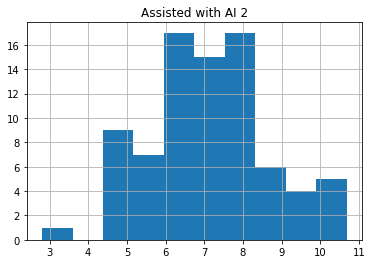

In [14]:
time_to_completion.loc[time_to_completion['Assisted with AI 2'] != -1,
                      'Assisted with AI 2'].hist()
plt.title('Assisted with AI 2')

In [17]:
mean_non_ai = np.mean(time_to_completion['Non-AI assisted'].values)

mean_ai1 =  np.mean(time_to_completion.loc[time_to_completion['Assisted with AI 1'] != -1,
                  'Assisted with AI 1'].values)
mean_ai2 = np.mean(time_to_completion.loc[time_to_completion['Assisted with AI 2'] != -1,
                  'Assisted with AI 2'].values)

group_mean = np.mean([mean_non_ai, mean_ai1, mean_ai2])

ss_between = 90 * ((mean_non_ai - group_mean) ** 2) + \
             81 * ((mean_ai1 - group_mean) ** 2) + \
             81 * ((mean_ai2 - group_mean) ** 2)

ss_within = np.sum((time_to_completion['Non-AI assisted'].values - mean_non_ai) ** 2) + \
            np.sum((time_to_completion.loc[time_to_completion['Assisted with AI 1'] != -1,
                  'Assisted with AI 1'].values - mean_ai1) ** 2) + \
            np.sum((time_to_completion.loc[time_to_completion['Assisted with AI 2'] != -1,
                  'Assisted with AI 2'].values - mean_ai2) ** 2)

N = 90 + 81 + 81
df1 = 2
df2 = N - 3

MSS_between = ss_between / df1
MSS_within = ss_within / df2

print(f'F-statistic = {MSS_between / MSS_within: .4f}')
print(f'p-value = {1 - f.cdf(MSS_between / MSS_within, df1, df2)}')

F-statistic =  37.0104
p-value = 8.43769498715119e-15


In [19]:
# Check if by-hand F-statistic is the same to the Scipy Implementation

f_results = f_oneway(
    time_to_completion['Non-AI assisted'],
    time_to_completion.loc[time_to_completion['Assisted with AI 1'] != -1,
                  'Assisted with AI 1'].values,
    time_to_completion.loc[time_to_completion['Assisted with AI 2'] != -1,
                  'Assisted with AI 2'].values    
)

print(f'F-statistic (scipy) = {f_results.statistic: .4f}')
print(f'p-value (scipy) = {f_results.pvalue}')

F-statistic (scipy) =  36.9419
p-value (scipy) = 8.924262286415934e-15


### **Conclusion**

Since the p-value of our F-statistic < 0.05 it suggests that we reject the Null Hypothesis. Which indicates that there statistical evidence that at least one combination amongst our Routing Solutions fairs better or worse than the other solution. We now proceed to find which solution/s reduces our driver's Time to Complete by using effect size tests.

### **Effect Size**

### Tukey / Tukey - Kramer Test

$$Tukey = q . \sqrt{\frac{MSS_{within}} {2} . ({\frac{1} {n_{1}} + {\frac{1} {n_{2}}})}}$$ <br>

### Q-Table for Tukey

https://www2.stat.duke.edu/courses/Spring98/sta110c/qtable.html

In [37]:
# Use α = 0.05

qcrit1 = 2.77 * np.sqrt((MSS_within / 2) * ((1 / 90 ) + (1 / 81)))
qcrit2 = 2.77 * np.sqrt((MSS_within / 2) * ((1 / 90 ) + (1 / 81)))
qcrit3 = 2.77 * np.sqrt((MSS_within / 2) * ((1 / 81 ) + (1 / 81)))

In [38]:
print(qcrit1, qcrit2, qcrit3)

0.44978898489367375 0.44978898489367375 0.46147376150726566


In [40]:
tukey_results = pd.DataFrame({
    'Name': ['Non-AI vs AI1', 'Non-AI vs AI2', 'AI1 vs AI2'],
    'Mean Difference': [mean_non_ai - mean_ai1, mean_non_ai - mean_ai2, mean_ai1 - mean_ai2],
    'Q-Critical': [qcrit1, qcrit2, qcrit3]    
})

tukey_results 

,Name,Mean Difference,Q-Critical
0,Non-AI vs AI1,0.963538,0.449789
1,Non-AI vs AI2,1.973601,0.449789
2,AI1 vs AI2,1.010063,0.461474


### **Conclusion**

Since the Mean Difference across our solutions is greater than their respective critical thresholds - that means drivers using :

AI1's Routing Solution generally finishes their deliveries faster than Non-AI drivers<br>
AI2's Routing Solution generally finishes their deliveries faster than Non-AI drivers<br>
AI2's Routing Solution generally finishes their deliveries faster than AI2 drivers<br>

### η^2

$$η^2 = \frac{MSS_{between}} {MSS_{between} + MSS_{within}} $$ <br>

In [196]:
eta_2 = MSS_between / (MSS_between + MSS_within)
print(f'η^2: {eta_2: .4f}')

η^2:  0.9737


### **Conclusion**

97% of the difference in mean Time to Complete Rates are brought about the different routing solutions